# Wine Quality Classification

In [28]:
# Load required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [29]:
# Load Dataset
df=pd.read_csv('wine.csv')

## Exploratary Data Analysis

In [30]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [32]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Wine Features and Their Correlation with Quality

- **Fixed Acidity**
  - **Definition:** Refers to non-volatile acids that do not evaporate easily, primarily tartaric, malic, citric, and other acids.
  - **Correlation with Quality:** Generally, higher fixed acidity can contribute to a fresher taste, but too much can make the wine taste too sour. Optimal levels are often preferred.

- **Volatile Acidity**
  - **Definition:** Measures the amount of acetic acid present in wine, which at high levels can lead to an unpleasant vinegar taste.
  - **Correlation with Quality:** Higher levels of volatile acidity are usually negatively correlated with quality, as they can indicate spoilage.

- **Citric Acid**
  - **Definition:** A minor acid in wine, contributing to freshness and flavor.
  - **Correlation with Quality:** Moderate amounts can enhance freshness; however, its direct impact on quality is relatively minor compared to other acids.

- **Residual Sugar**
  - **Definition:** The amount of sugar remaining after fermentation stops. It contributes to the sweetness of the wine.
  - **Correlation with Quality:** Higher residual sugar can indicate a sweeter wine style, which can be positively or negatively correlated with quality depending on the balance with other elements.

- **Chlorides**
  - **Definition:** Measures the amount of salt in the wine.
  - **Correlation with Quality:** Higher chloride levels can give a salty taste and are usually negatively correlated with quality.

- **Free Sulfur Dioxide**
  - **Definition:** The amount of SO₂ that is not bound and is available to act as an antimicrobial and antioxidant.
  - **Correlation with Quality:** Appropriate levels are important for preserving wine and preventing spoilage, which is positively correlated with quality.

- **Total Sulfur Dioxide**
  - **Definition:** The sum of free and bound sulfur dioxide present in wine.
  - **Correlation with Quality:** Excessive amounts can lead to undesirable flavors and aromas, thus negatively impacting quality.

- **Density**
  - **Definition:** Refers to the mass per unit volume of wine; it can be influenced by alcohol and sugar content.
  - **Correlation with Quality:** It can indicate the potential alcohol content and body of the wine. Density itself isn't directly correlated with quality but provides insights into other important attributes.

- **pH**
  - **Definition:** Measures the acidity/basicity of the wine on a scale from 0 to 14.
  - **Correlation with Quality:** Optimal pH levels contribute to stability and taste balance; wines with extremely high or low pH levels can be unbalanced and lower in quality.

- **Sulphates**
  - **Definition:** Sulphates (like potassium sulphate) contribute to the wine’s sulfur dioxide content.
  - **Correlation with Quality:** Proper levels can enhance flavor and preservation, while excessive amounts can be detrimental, thus having a variable impact on quality.

- **Alcohol**
  - **Definition:** The ethanol content in wine, typically expressed as a percentage of volume.
  - **Correlation with Quality:** Alcohol content can affect the body, flavor, and balance of the wine. Both too low and too high alcohol levels can negatively affect quality, but balanced levels are often associated with higher quality.

- **Quality**
  - **Definition:** A subjective measure typically rated on a scale, reflecting the overall perception of the wine's attributes, including aroma, taste, and balance.



In [33]:
#Turning strings in column "quality" into binary labels

df=df.replace("good",1)
df=df.replace("bad",0)

C:\Users\abbas\AppData\Local\Temp\ipykernel_17432\88924629.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace("bad",0)


In [34]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [37]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Text(0.5, 1.0, 'Correlation diagram of fixed acity with quality')

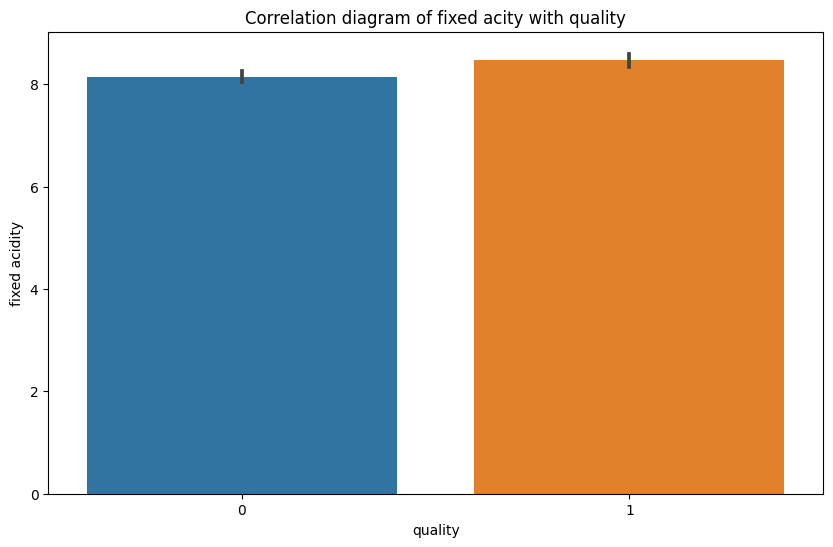

In [17]:
# Correlation diagram of fixed acity with quailty

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)
plt.title('Correlation diagram of fixed acity with quality')


<Axes: xlabel='quality', ylabel='volatile acidity'>

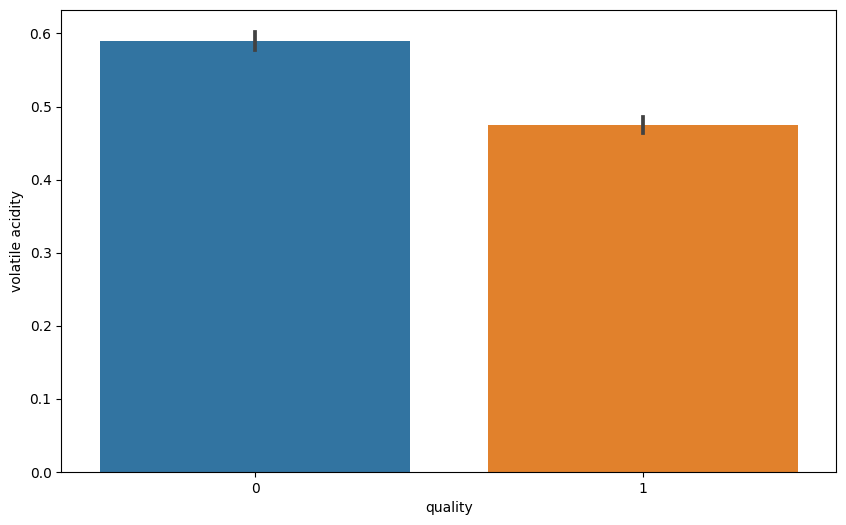

In [44]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

<Axes: xlabel='quality', ylabel='citric acid'>

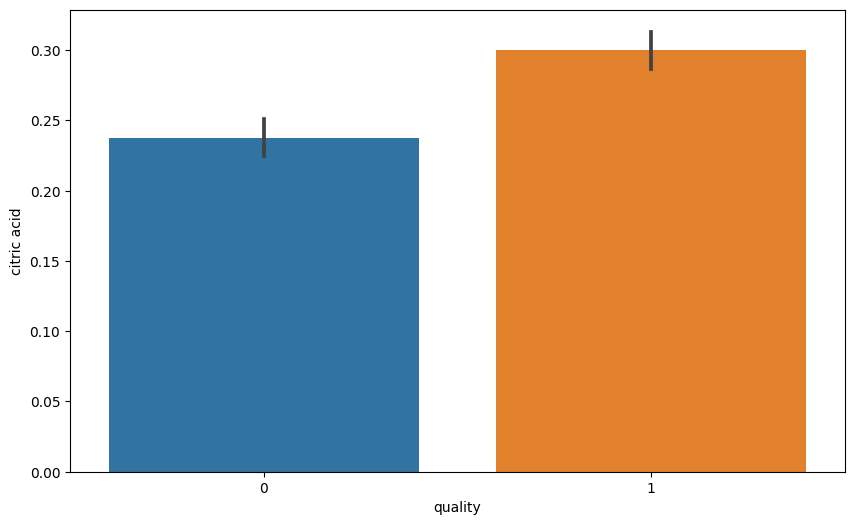

In [45]:
#Composition of citric acid go higher as we go higher in the quality of the wine

fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='citric acid',data=df)

<Axes: xlabel='quality', ylabel='residual sugar'>

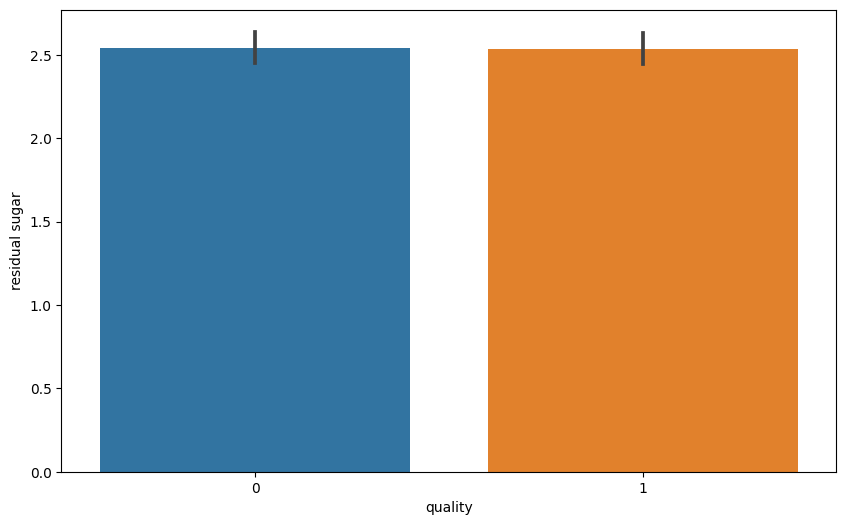

In [46]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

<Axes: xlabel='quality', ylabel='chlorides'>

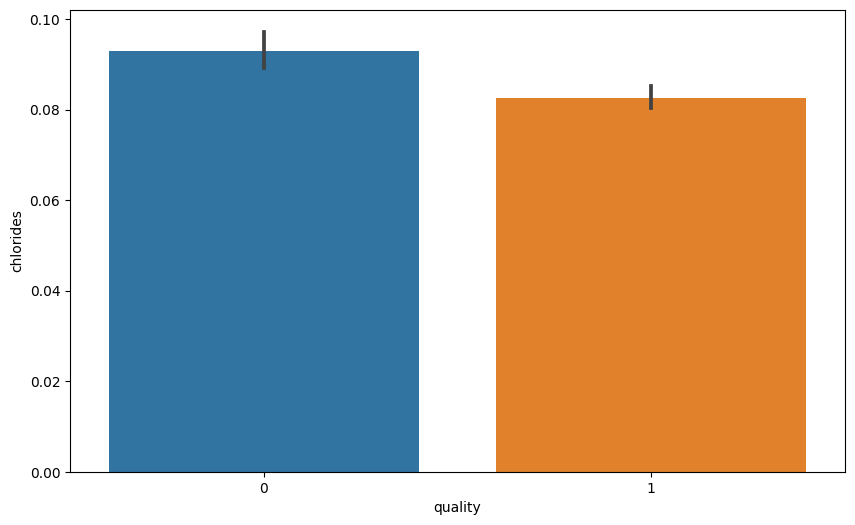

In [47]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

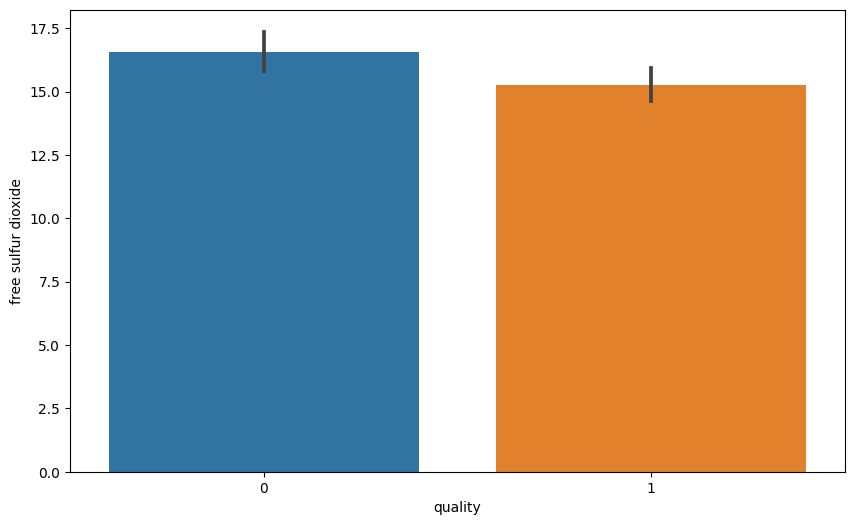

In [48]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

<Axes: ylabel='count'>

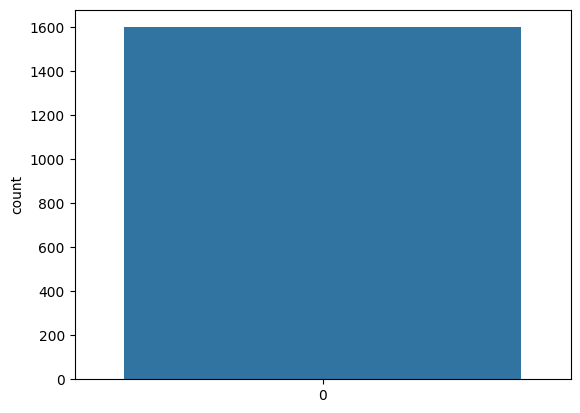

In [49]:
sns.countplot(df['quality'])

In [50]:
#Let's start model training part

from sklearn.model_selection import train_test_split
X = df.drop(["quality"], axis = 1).values
y = df["quality"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

In [51]:
#Applying Random forest algorithm
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion = "gini", n_estimators = 90)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.805